In [1]:
%matplotlib inline

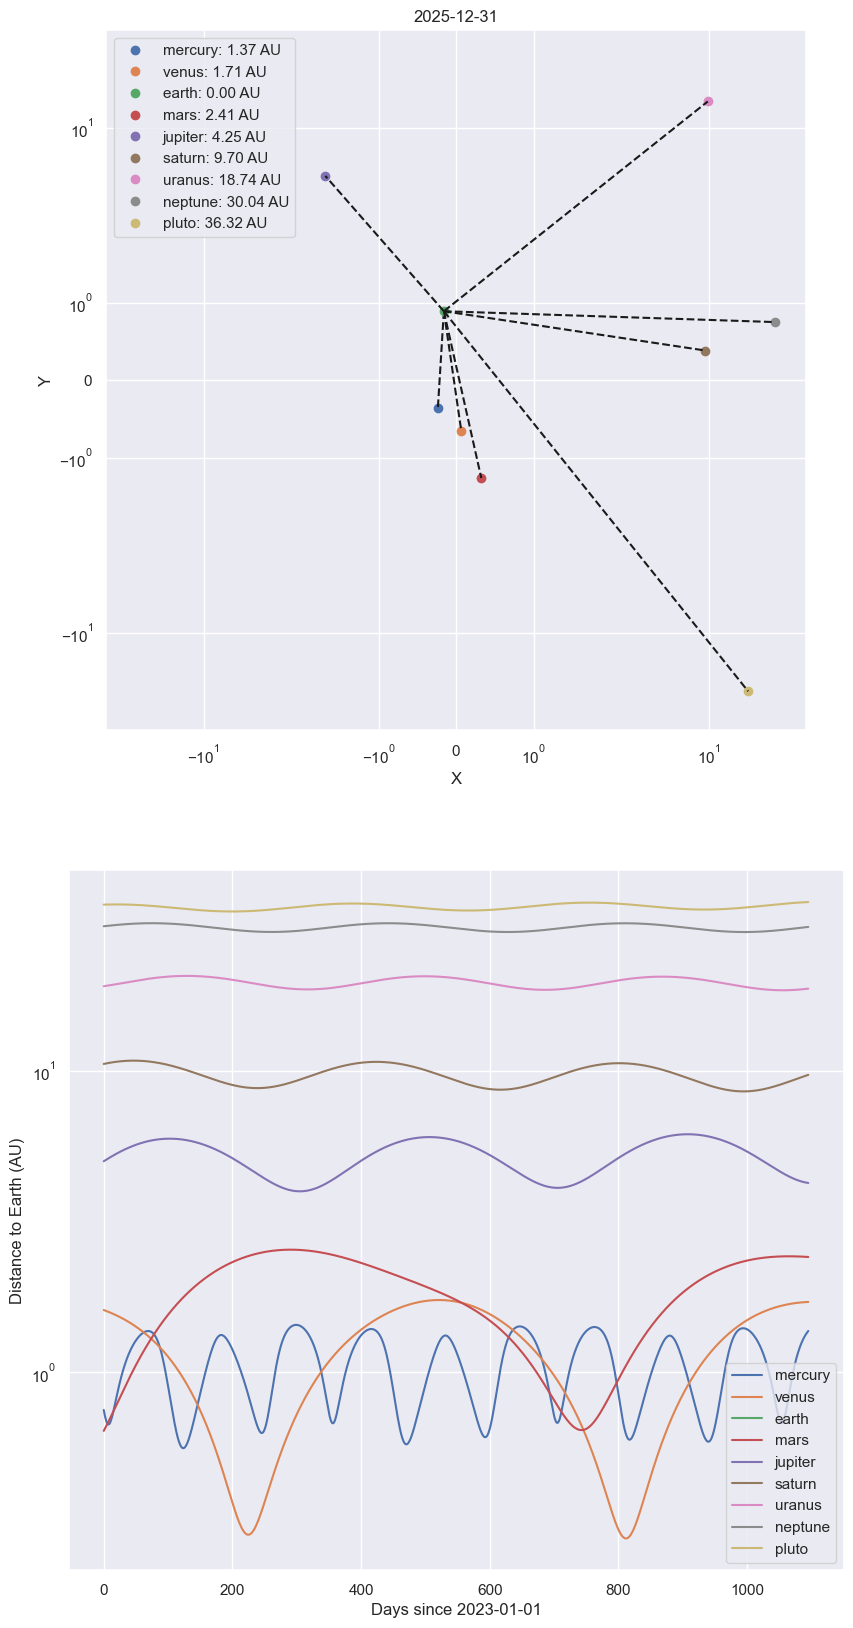

In [3]:
import seaborn
seaborn.set()

from skyfield.api import load
import matplotlib.pyplot as plt
from IPython.display import clear_output
from datetime import datetime, timedelta
import time
import numpy as np

# Load data of planets and stars
planets = load('de421.bsp')

sun = planets['sun']
earth = planets['earth barycenter']

# We choose the planets we want
planet_names = ["mercury barycenter", "venus barycenter", "earth barycenter", "mars barycenter", "jupiter barycenter", 
                "saturn barycenter", "uranus barycenter", "neptune barycenter", "pluto barycenter"]
planet_objects = [planets[name] for name in planet_names]
planet_names = [name.replace(' barycenter', '') for name in planet_names]

# Define the time scale
ts = load.timescale()

# Dates from 2023 to 2025
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 12, 31)
delta = end_date - start_date

# Store distance data
distance_data = {name: [] for name in planet_names}

# Generate a new plot every day
for i in range(delta.days + 1):
    # Current date
    current_date = start_date + timedelta(days=i)
    
    # Time since 1 Jan 2000 in Earth years
    t = ts.utc(current_date.year, current_date.month, current_date.day)

    # Create a big figure
    fig, axs = plt.subplots(2, 1, figsize=(10, 20))

    # First subplot for the solar system plot
    ax = axs[0]
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-50,50)
    ax.set_ylim(-50,50)
    ax.set_xscale('symlog')
    ax.set_yscale('symlog')

    # Plot each planet's position relative to the Sun
    earth_position = sun.at(t).observe(earth).xyz.au
    for name, planet in zip(planet_names, planet_objects):
        position = sun.at(t).observe(planet).xyz.au
        x, y, z = position

        # Calculate distance to Earth
        distance_to_earth = np.sqrt((x - earth_position[0])**2 + (y - earth_position[1])**2 + (z - earth_position[2])**2)  # convert km to AU
        label = f'{name}: {distance_to_earth:.2f} AU'
        ax.plot(x, y, 'o', label=label)
        
        # Store distance data
        distance_data[name].append(distance_to_earth)

        # Plot a dashed line from Earth to the planet
        if name != 'earth':
            ax.plot([earth_position[0], x], [earth_position[1], y], 'k--')

    ax.set_title(current_date.strftime('%Y-%m-%d'))
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    # Second subplot for the distance plot
    ax = axs[1]
    for name, distances in distance_data.items():
        ax.plot(range(len(distances)), distances, label=name)
    ax.set_xlabel('Days since 2023-01-01')
    ax.set_ylabel('Distance to Earth (AU)')
    ax.set_yscale('log')
    ax.legend()

    # Save the plots as an image
    fig.savefig(f'planets/combined_plot_{i}.png')

    # Clear the previous plot
    clear_output(wait=True)
    plt.show()
    time.sleep(0.2)


In [6]:
!ffmpeg -framerate 25 -i planets/combined_plot_%d.png -c:v libx264 -pix_fmt yuv420p planets.mp4

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (conda-forge gcc 12.2.0-19)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1685720108241/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1685720108241/_build_env/bin/x86_64-conda-linux-gnu-cc --cxx=/home/conda/feedstock_root/build_artifacts/ffmpeg_1685720108241/_build_env/bin/x86_64-conda-linux-gnu-c++ --nm=/home/conda/feedstock_root/build_artifacts/ffmpeg_1685720108241/_build_env/bin/x86_64-conda-linux-gnu-nm --ar=/home/conda/feedstock_root/build_artifacts/ffmpeg_1685720108241/_build_env/bin/x86_64-conda-linux-gnu-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libda